In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

from scipy.io import wavfile
import IPython

# Audio

Sound waves have two important characteristics, the frequency and intensity/amplitude.
1. Frequency - refers to the pitch of the sound.
2. Amplitude - this determines the volume of the sound.

A digital audio signal has two components:
1. Sample rate - relates to the frequency of the sound waves
2. Samples - measures the amplitude of sound waves.

In [ ]:
# Get sample rate and samples from wav file
rate, samples = wavfile.read("tada.wav")

# Play the audio
IPython.display.Audio(filename="tada.wav")

In [ ]:
# Derive time from samples and sample rate
duration = len(samples)/rate
time = np.arange(0, duration, 1/rate)

plt.figure()
plt.plot(time, samples)
plt.xlabel("time (s)")
plt.ylabel("samples")

# Generating white noise

Write a two second random sound wave at a rate of 44100 Hz

In [ ]:
# The samples must be one of four numerical datatypes: 32-bit float, 32-bit integers, 16-bit integers, or 8-bit unsigned integers
samples = np.random.randint(-32768, 32767, 88200, dtype=np.int16)
wavfile.write("white_noise.wav", 44100, samples)

# Scaling

A 16-bit integer is between −32768 and 32767. If the elements of an array of samples are not all within this range, the samples must be scaled before writing to a file. We use the following to scale
    $$\text{scaled samples} = \text{np.int16}\left( \left( \frac{\text{original samples}}{\max(|\text{original samples}|)} \times 32767 \right) \right)$$

# Generating sounds

Sinusoidal waves correspond to pure frequencies, like a single note from a piano. To create a specific tone for 1 second, we sample from the sinusoid with period 1, 
    $$\text{sample}(t) = \sin(2 \pi k t), \quad t \in [0,s]$$ <br/>
where $k$ is the desired frequency. The formula for $t$ is 
    $$t = r * s / r$$<br/>

Generating a sound that lasts for $s$ seconds at sample rate $r$ requires $r s$ equally spaced samples in the interval $[0,s]$.

$$\begin{array}{c|c}
\text{Note } & \text{Frequency }(\mathrm{Hz}) \\
\hline 
\mathrm{A} & 440 \\
\mathrm{B} & 493.88 \\
\mathrm{C} & 523.25 \\
\mathrm{D} & 587.33 \\
\mathrm{E} & 659.25 \\
\mathrm{F} & 698.46 \\
\mathrm{G} & 783.99 \\
\mathrm{A} & 880
\end{array}$$

In [76]:
# Frequencies per note
k_A = 440
k_B = 493.88
k_C = 523.25
k_D = 587.33
k_E = 659.25
k_F = 698.46
k_G = 783.99

def tone_generator(k,s):
    '''
    k: frequency
    s: duration of tone
    '''
    
    total_num_samples = r*s   # r*s refers to the number of samples
    t = np.arange(total_num_samples) / r 
    samples = np.sin(2* np.pi * k * t)
    
    # Scales the samples
    scaled_samples = np.int16(((samples / np.max(samples)) * 32767 ))
    return scaled_samples


class SoundWave:
    
    # Constructor
    def __init__(self, sample_rate, samples):
        self.sample_rate = sample_rate
        self.samples = samples
        
    # Methods
    # Plots the Soundwave
    def plot_soundwave(self, title="Sound"):
        '''
            Plots the soundwave.
        '''
        duration = len(self.samples)/self.sample_rate
        time = np.arange(0, duration, 1/self.sample_rate)

        plt.plot(time, self.samples)
        plt.ylim(-32768, 32767)
        plt.xlabel("time (s)")
        plt.ylabel("samples")
        plt.title(title)
        
        
    # Forced scaling
    def write_sound_as_int16(self, filename, force):
        '''
            Write to the specified file using the stored sample rate and the array of samples.
        '''
        
        # If the samples aren't in integer 16-bit dtype or force = True, then we rescale the samples to int16. 
        # We then write it into a new wavfile. 
        if (str(self.samples.dtype) != 'int16') or (force == True):
            scaled_samples = np.int16(((self.samples / np.max(self.samples)) * 32767 ))
            wavfile.write(filename, self.sample_rate, scaled_samples)
            
        # If conditions are not met, do nothing.
        else:
            pass
        
        
    def export_sound(self, filename):
        wavfile.write(filename, self.sample_rate, self.samples)
        
        
    def plot_magnitude(self, DFT):
        self.magnitudes = np.abs(DFT)
        self.frequencies = np.linspace(1, len(DFT), len(DFT)) * self.sample_rate / len(self.samples)
        
        plt.plot(frequencies, magnitudes)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.xlim(0, 10000)
        
        
        
    # If A and B are SoundWave instances, then A + B creates a new SoundWave instance 
    def __add__(self, other):  
        '''
        from https://stackoverflow.com/questions/46407931/add-two-class-objects
        '''
        
        if len(self.samples) != len(other.samples):
            raise("A and B must have the length.")
        else:
            return SoundWave(self.sample_rate, self.samples + other.samples)
    
    def __rshift__(self, other):
        return SoundWave(self.sample_rate, np.hstack((self.samples, other.samples)))

# Comparison

In [ ]:
# Original instance
rate, samples = wavfile.read("tada.wav")
tada = SoundWave(rate, samples)
tada.write_sound_as_int16("tada_scaled.wav", force=True)

# Scaled instance
rate_scaled, samples_scaled = wavfile.read("tada_scaled.wav")
tada_scaled = SoundWave(rate_scaled, samples_scaled)

# Plot
plt.figure()
plt.subplot(121)
tada.plot_soundwave(title="Original")

plt.subplot(122)
tada_scaled.plot_soundwave(title="Scaled")

plt.tight_layout()

### Play sounds

In [ ]:
IPython.display.Audio(filename="tada.wav")

In [ ]:
IPython.display.Audio(filename="tada_scaled.wav") # Much louder than the original

# Adding and Concatenating tones

In [ ]:
# r = 44100
# s = 3

# soundA = SoundWave(r, tone_generator(k_A, s))
# sound2A = SoundWave(r, tone_generator(2*k_A, s))

# sound_new = soundA + sound2A
# sound_new.export_sound("new_sound.wav")
# IPython.display.Audio(filename="new_sound.wav")




# # Concatenating sound

# r = 44100
# s = 1

# soundA = SoundWave(r, tone_generator(k_A, s))
# soundC = SoundWave(r, tone_generator(k_C, s))
# soundE = SoundWave(r, tone_generator(k_E, s))

# sound_new = soundA >> soundC >> soundE

# sound_new.export_sound("new_sound.wav")
# IPython.display.Audio(filename="new_sound.wav")

# Discrete Fourier Transform

All sound waves are sums of varying amounts of different frequencies. For discrete samples,
    $$\vec{f} = \begin{pmatrix} f_0 \\ f_1 \\ \vdots \\ f_{n-1}\end{pmatrix},$$
each $f_i$ corresponds to the amplitude of the sound wave at a specific instant in time. We can write the sound wave as 
    $$\vec{f} = \sum_{k=0}^{n-1} c_k \vec{w}_n^{(k)}$$
where $\vec{w}_n^{(k)}$ is called the discrete Fourier basis which represents different frequencies, and $c_k$ refers to the amount of each frequency present in the sound wave. The DFT is a linear transformation that takes $\vec{f}$ and finds the 
    $$ \vec{c} = \begin{pmatrix} c_0 \\ c_1 \\ \vdots \\ c_{n-1}\end{pmatrix} $$
needed to write $\vec{f}$ in this frequency basis. $\vec{f}$ is generated by taking $n$ evenly spaced samples of the sound wave. So we generate the bases $\left\{ \vec{w}_n^{(k)} \right\}_{n=0}^{n-1}$ by taking n evenly-spaced samples of the frequencies represented by the oscillating functions $\left\{ e^{-2\pi i kt/n} \right\}_{n=0}^{n-1}$.




The DFT is the change of basis matrix: 
    $$\mathbb{F}_{n}=\frac{1}{n}\left[\begin{array}{lllll}
\mathbf{w}_{n}^{0} & \mathbf{w}_{n}^{1} & \mathbf{w}_{n}^{2} & \cdots & \mathbf{w}_{n}^{n-1}
\end{array}\right]=\frac{1}{n}\left[\begin{array}{ccccc}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega_{n}^{-1} & \omega_{n}^{-2} & \cdots & \omega_{n}^{-(n-1)} \\
1 & \omega_{n}^{-2} & \omega_{n}^{-4} & \cdots & \omega_{n}^{-2(n-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_{n}^{-(n-1)} & \omega_{n}^{-2(n-1)} & \cdots & \omega_{n}^{-(n-1)^{2}}
\end{array}\right]$$
where 
    $$\omega_n = e^{2 \pi i / n}$$
Hence, the DFT of $\vec{f}$ is
    $$\vec{c} = \mathbb{F}_n \vec{f}$$

In [3]:
# Vectorized
def vectorized_DFT_matrix(n):
    '''
    f: samples
    '''
    i,j = np.meshgrid(np.arange(n),np.arange(n))
    
    # Natural frequency
    w = np.exp(2 * np.pi * 1j / n)
    
    # SLOW
#     F_n =  np.zeros((n, n))  # DFT matrix
#     for i in range(0,n):
#         for j in range(0,n):
#             F_n[i,j] = omega**(-(i-1) * (j-1))
    
    # DFT matrix using vectorization
    F_n = np.power(w, i * j)
    
    return F_n

In [61]:
r = 8192
s = 1

soundA = SoundWave(r, tone_generator(k_A, s))
f = soundA.samples

soundA.export_sound("soundA.wav")
IPython.display.Audio(filename="soundA.wav")

In [62]:
# DFT matrix
F_n = vectorized_DFT_matrix(len(f)) # much faster!

# DFT 
c = F_n @ f # 1D vector

# Fast Fourier Transform

In [4]:
def FastFourierTransform(f, N, power2req=False):
    '''
    f: data
    N: length of f
    '''
    
    # Check if N is a power of 2
    if power2req==True:
        def is_power_of_two(N):
            return (N != 0) and (N & (N-1) == 0)
    
        if is_power_of_two(N) != True:
            raise Exception("N must be a power of two")
    
    def SPLIT(g):
        n = g.size
        if n <= N:
            return n * vectorized_DFT_matrix(len(f)) @ g
        
        else:
            even = g[::2]
            odd = g[1::2]
            z = np.zeros(n)
            
            for k in range(0,n):
                z[k] = np.exp(-2 * np.pi * 1j * k / n)
            
            m = n // 2
            return np.hstack((even + z[:m] * odd, odd + z[:m] * even))
        
    return SPLIT(f) / f.size

In [ ]:
# Example

# Visualizing the DFT

The graph of the DFT (plotting in the frequency domain) shows which frequencies are present in the sound wave. 

# Single tone

<IPython.core.display.Javascript object>


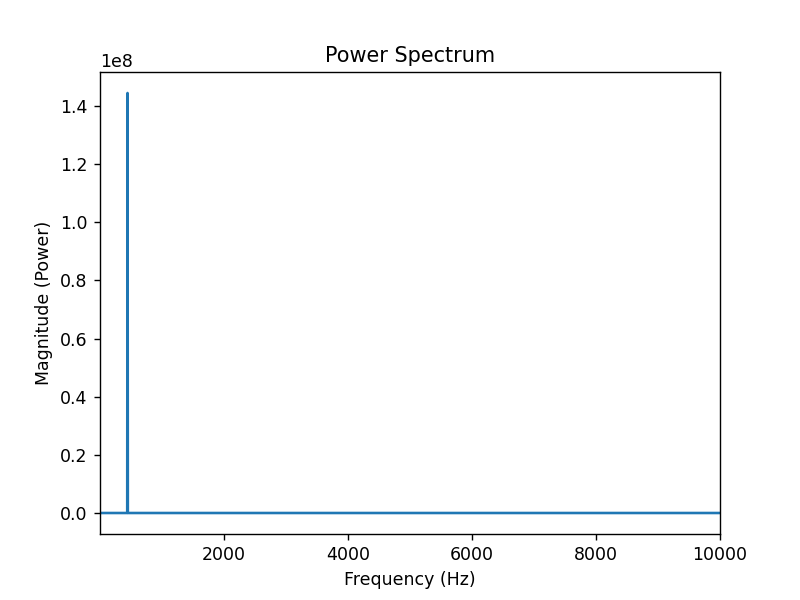

(1.0, 10000.0)

In [14]:
r = 44100
s = 0.2
soundA = SoundWave(r, tone_generator(k_A, s))
f = soundA.samples

# Compute the FFT
f_fft = FastFourierTransform(f, len(f))

magnitudes = np.abs(f_fft)
frequencies = np.linspace(1, len(f_fft), len(f_fft)) * r / len(f)

plt.figure()
plt.plot(frequencies, magnitudes)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (Power)")
plt.title("Power Spectrum")
plt.xlim(1, 10000)

# tada.wav

In [9]:
rate, samples = wavfile.read("tada.wav")

# These are the Fourier coefficients
c_tada = fft(samples) #FastFourierTransform(samples, len(samples)) (too computationally expensive)

magnitudes = np.abs(c_tada)
frequencies = np.linspace(1, len(c_tada), len(c_tada)) * rate / len(samples)

<IPython.core.display.Javascript object>


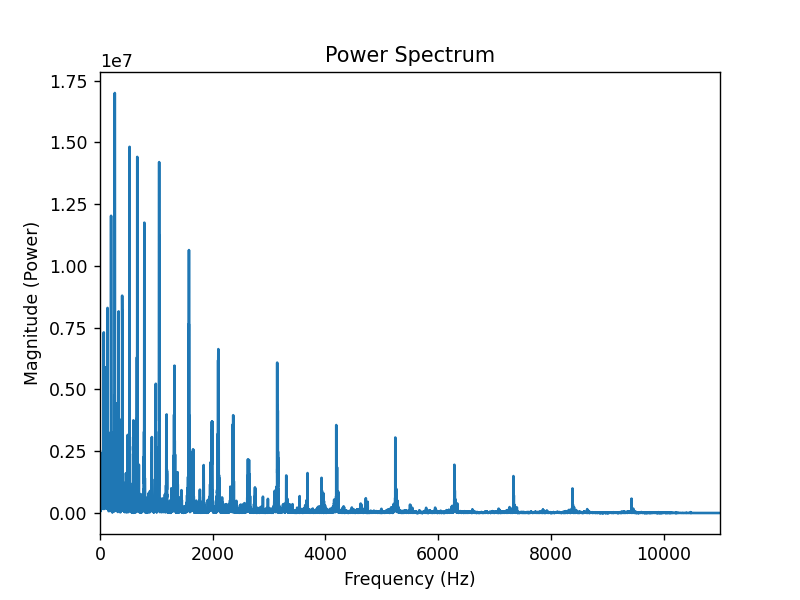

(0.0, 11000.0)

In [12]:
plt.figure()
plt.plot(frequencies, magnitudes)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (Power)")
plt.title("Power Spectrum")
plt.xlim(0, 11000)

# Single note with white noise

In [55]:
# Generate 0.2 second white noise
r = 44100
white_noise_samples = np.random.randint(-4000, 4000, 8820, dtype=np.int16)
wavfile.write("white_noise.wav", r, white_noise_samples)

w_noise_samples = wavfile.read("white_noise.wav")[1]

# Create SoundWave instance for the white noise samples
sound_white_noise = SoundWave(r, w_noise_samples) 

In [56]:
# Generate single tone

s = 0.2
soundG = SoundWave(r, tone_generator(k_G, s))

In [57]:
# Combine white noise and single note

sound = soundG + sound_white_noise
sound.export_sound("note+whitenoise.wav")
IPython.display.Audio(filename="note+whitenoise.wav")

In [58]:
# Compute the DFT

sound_with_wnoise_fft = FastFourierTransform(sound.samples, len(sound.samples))

<IPython.core.display.Javascript object>


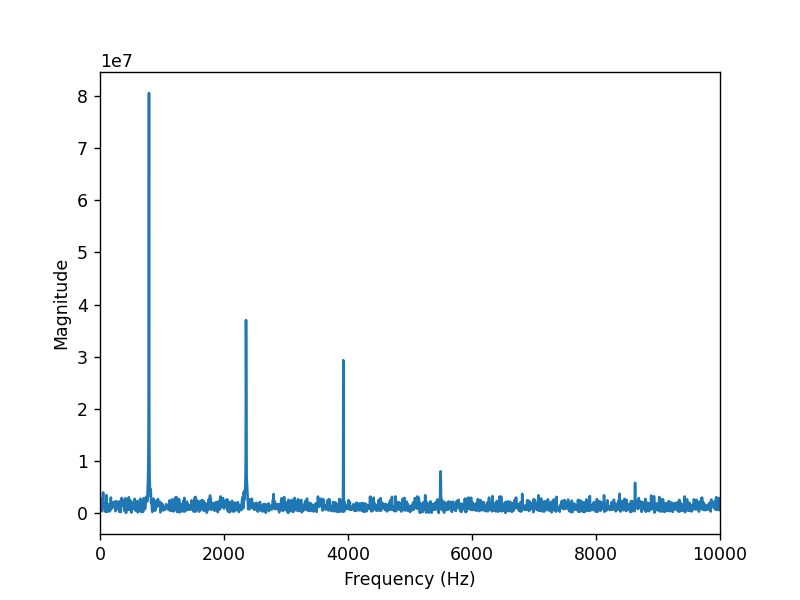

In [60]:
plt.figure()
sound.plot_magnitude(sound_with_wnoise_fft)

# Mystery Chord

In [82]:
IPython.display.Audio(filename="mystery_chord.wav")

In [83]:
# Get the sampling rate and samples

mystery_chord_rate, mystery_chord_samples = wavfile.read("mystery_chord.wav")

mystery_chord = SoundWave(mystery_chord_rate, mystery_chord_samples) 

In [84]:
# Compute for the fft

mystery_chord_fft = fft(mystery_chord_samples)

<IPython.core.display.Javascript object>


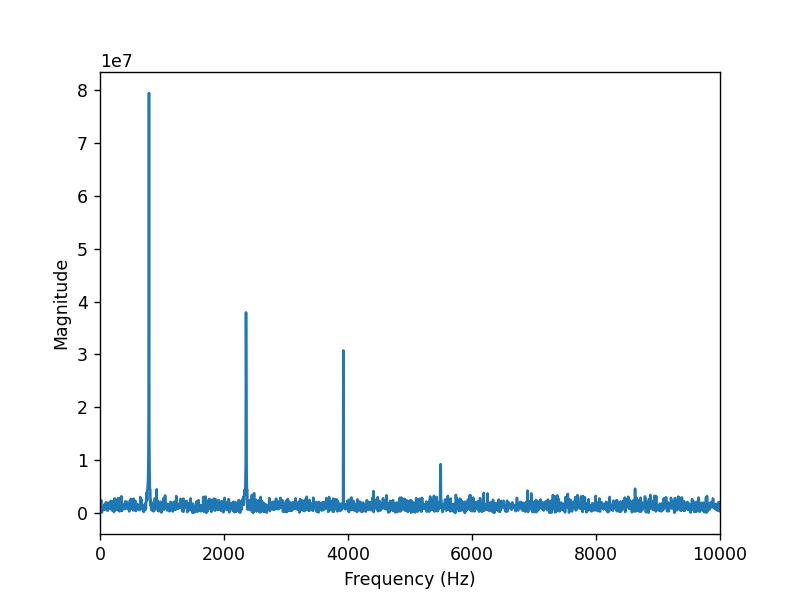

In [86]:
plt.figure()
mystery_chord.plot_magnitude(mystery_chord_fft)

In [90]:
mystery_chord.frequencies[np.argsort(mystery_chord.magnitudes)[::-1][:4]]

array([43660.25,   440.25,   784.25, 43316.25])

# The notes are A and G.

<IPython.core.display.Javascript object>


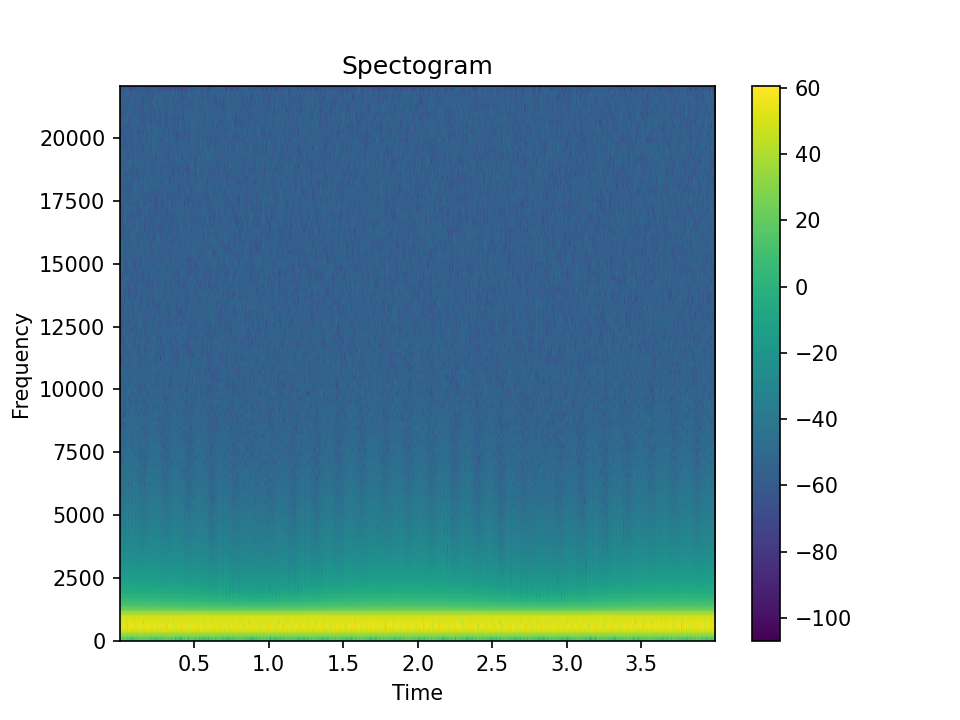

In [91]:
fig, ax = plt.subplots()

v1, v2, v3, v4 = ax.specgram(mystery_chord_samples, Fs=mystery_chord_rate)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title("Spectogram")

fig.colorbar(v4)